Alumno: Milton Aldair Martínez Acosta  

Matrícula: 1870354

Estadística Aplicada

Grupo: 051

**Librerias utilizadas:**

In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import multivariate_logrank_test
from lifelines.statistics import logrank_test

In [57]:
#fijar el tamaño de las graficas
plt.rcParams['figure.figsize'] = [10, 7.5]

# Parte II. Modelos de supervivencia

## 1) 

### Introducción

-Problema de supervivencia analizado: "employee attrition"

-Mide diversos factores que afectan a los empleados durante su estancia en la empresa

-El evento es renunciar a la empresa

-El tiempo que se mide, es el que pasó hasta que el empleado renunció

## 2)

En el caso de esta función de supervivencia

Conocer el comportamiento de esta función de supervivencia es muy importante para el departamento de RH de la empresa que aporta los datos

Esto se debe a que, si conocen cuales factores contribuyen de mayor manera a que los empleados renuncien, pueden empezar a hacer mejoras en esas áreas

Por ejemplo: pueden detectar anomalías en un departamento en concreto o que se esta asignando demasiado trabajo 

## 3)

La base de datos no tiene censura 

En este caso en específico es díficil que la base de datos tenga censura porque se debe tener un registro correcto de las situaciones de los empleados

## 4)

In [58]:
ea = pd.read_csv('https://raw.githubusercontent.com/Miltonmtz/Tareas_EstadisticaAplicada_22/master/employee_attrition.csv')

In [59]:
ea

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [60]:
# replacing values
ea['salary'].replace(['low', 'medium', 'high'],[1, 2, 3], inplace=True)
ea['department'].replace(['accounting', 'hr', 'IT', 'management', 'marketing', 'product_mng', 'RandD', 'sales', 'support', 'technical'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

In [61]:
ea

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,8,1
1,0.80,0.86,5,262,6,0,1,0,8,2
2,0.11,0.88,7,272,4,0,1,0,8,2
3,0.72,0.87,5,223,5,0,1,0,8,1
4,0.37,0.52,2,159,3,0,1,0,8,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,9,1
14995,0.37,0.48,2,160,3,0,1,0,9,1
14996,0.37,0.53,2,143,3,0,1,0,9,1
14997,0.11,0.96,6,280,4,0,1,0,9,1


Clave (department)

accounting - 1

hr - 2

IT - 3

management - 4 

marketing - 5 

product_mng - 6 

RandD - 7

sales - 8 

support - 9 

technical - 10

## 5)

In [62]:
ea.isnull().values.any()

False

In [63]:
ea.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [64]:
# Use the keep parameter to consider only the first instance of a duplicate row to be unique
bool_series = ea.duplicated(keep='first')
print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after keeping only the first instance of the duplicate rows:')

# The `~` sign is used for negation. It changes the boolean value True to False and False to True.

eafix = ea[~bool_series]
eafix

Boolean series:
0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool


DataFrame after keeping only the first instance of the duplicate rows:


,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,8,1
1,0.80,0.86,5,262,6,0,1,0,8,2
2,0.11,0.88,7,272,4,0,1,0,8,2
3,0.72,0.87,5,223,5,0,1,0,8,1
4,0.37,0.52,2,159,3,0,1,0,8,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,4,3
11996,0.74,0.95,5,266,10,0,0,1,4,3
11997,0.85,0.54,3,185,10,0,0,1,4,3
11998,0.33,0.65,3,172,10,0,0,1,5,3


Si teniamos bastantes datos repetidos

## 6)

In [65]:
eafix.describe()

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,6.969811,1.60387
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,2.755040,0.63590
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,5.000000,1.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,8.000000,2.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,9.000000,2.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,10.000000,3.00000


Para las **variables dummys** solo me parece relevante la media, porque directamente nos dice el porcentaje de la opción a la que se le asigno el número 1, mientras que las otras nos hablan de distribución de datos pero estas variables solo son 0 y 1.

_work_accident_ tiene una media de 0.1543, interpretamos que un 15.43% de los trabajadores de nuestra base de datos ha tenido algún accidente

_left_ tiene una media de 0.1660, interpretamos que un 16.6% de los trabajadores de nuestra base de datos ha renunciado

_promotion_last_5years_ tiene una media de 0.01693, interpretamos que el 1.69% de los trabajadores han sido ascendidos en los últimos 5 años

**Variables numéricas**

_satisfaction_level_ un 50% de nuestros trabajadores tienen un nivel de satisfacción mayor a 0.66, en promedio el nivel de satisfacción de nuestros trabajores es de 0.6297

_average_montly_hours_ en promedio nuestros tabajadores trabajan 200.4735 horas mensuales, un 50% de nuestros trabajadores trabaja más de 200 horas, el mínimo de horas que se trabaja son 96 y el máximo 310

## 7)

In [35]:
eafix["time_spend_company"].mean()

3.3648569760653824

## 8)

In [36]:
kmf = KaplanMeierFitter()

<AxesSubplot:xlabel='timeline'>

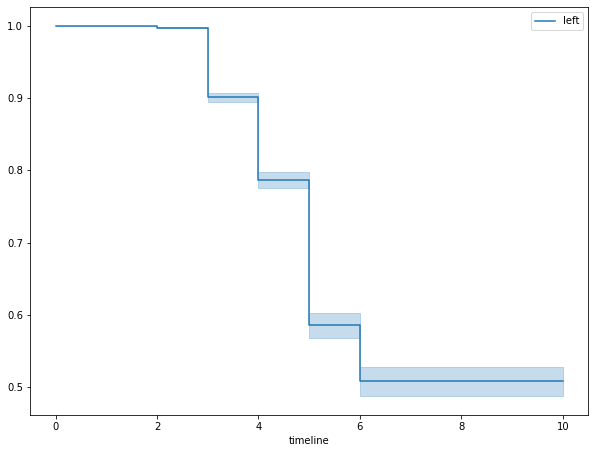

In [37]:
kmf.fit(eafix['time_spend_company'], eafix['left'], label = "left").plot()

In [38]:
kmf.survival_function_

,left
timeline,
0.0,1.000000
2.0,0.997415
3.0,0.901419
4.0,0.786743
5.0,0.585677
6.0,0.508203
7.0,0.508203
8.0,0.508203
10.0,0.508203


In [39]:
kmf.median_survival_time_

inf

El modelo nos dice que el valor de la mediana de la supervivencia tiende a infinito, esto puede ser porque este modelo no llega al tiempo en que el que "time_spend_company" llega a 0.5. Comos sabemos, la mediana es el valor que esta al 50% y como en este caso no llegamos hasta ese punto la mediana es indeterminada y el programa nos muestra infinito

## 9)

**Variable elegida:** *average_montly_hours*

In [40]:
eafh = eafix.assign(hours=pd.cut(eafix['average_montly_hours'], 
                               bins=[95, 157, 199, 243, 311], 
                               labels=['bajo', 'medio', 'alto', 'explotacion']))

In [41]:
freq = eafh.groupby(['hours']).count() 
print(freq)

             satisfaction_level  last_evaluation  number_projects  \
hours                                                               
bajo                       3005             3005             3005   
medio                      2987             2987             2987   
alto                       3032             3032             3032   
explotacion                2967             2967             2967   

             average_montly_hours  time_spend_company  work_accident  left  \
hours                                                                        
bajo                         3005                3005           3005  3005   
medio                        2987                2987           2987  2987   
alto                         3032                3032           3032  3032   
explotacion                  2967                2967           2967  2967   

             promotion_last_5years  department  salary  
hours                                                   
ba

In [42]:
bajo = eafix[eafix['average_montly_hours'] <= 157]
bajot = bajo['time_spend_company']
bajol = bajo['left']

medio = eafix[ (eafix['average_montly_hours'] >157) & (eafix['average_montly_hours'] <= 199)]
mediot = medio['time_spend_company']
mediol = medio['left']

alto = eafix[ (eafix['average_montly_hours'] >199) & (eafix['average_montly_hours'] <= 243)]
altot = alto['time_spend_company']
altol = alto['left']

exp = eafix[ (eafix['average_montly_hours'] >243) & (eafix['average_montly_hours'] <=311)]
expt = exp['time_spend_company']
expl = exp['left']

In [43]:
bajo = bajo.reset_index()
medio = medio.reset_index()
alto = alto.reset_index()
exp = exp.reset_index()

In [44]:
bajo = bajo.drop(bajo.index[0:38],axis=0)
bajot = bajo['time_spend_company']
bajol = bajo['left']

In [45]:
medio = medio.drop(medio.index[0:20],axis=0)
mediot = medio['time_spend_company']
mediol = medio['left']

In [46]:
alto = alto.drop(medio.index[0:65],axis=0)
altot = alto['time_spend_company']
altol = alto['left']

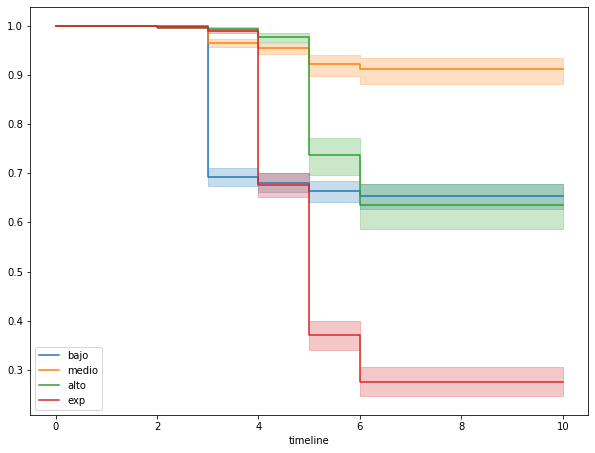

In [47]:
ax = plt.subplot(111)
ax = kmf.fit(bajot, bajol, label = "bajo").plot(ax=ax)
ax = kmf.fit(mediot, mediol, label = "medio").plot(ax=ax)
ax = kmf.fit(altot, altol, label = "alto").plot(ax=ax)
ax = kmf.fit(expt, expl, label = "exp").plot(ax=ax)

In [48]:
bajot = bajot.reset_index()
mediot = mediot.reset_index()
altot = altot.reset_index()
expt = expt.reset_index()

In [49]:
bajot = bajot.drop(['index'], axis=1)
mediot = mediot.drop(['index'], axis=1)
altot = altot.drop(['index'], axis=1)
expt = expt.drop(['index'], axis=1)

Prueba de hipótesis multivariate_logrank_test

![alt text](Captura.png "Title")

In [70]:
multivariate_logrank_test(bajot['time_spend_company'], mediot['time_spend_company'], altot['time_spend_company'], expt['time_spend_company'], event_observed_A = bajol , event_observed_B = mediol,  event_observed_C = altol , event_observed_D = expl)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 7
  event_observed_A = 38      1
39      1
40      1
41      1
42      1
       ..
3000    0
3001    0
3002    0
3003    0
3004    0
Name: left, Length: 2967, dtype: int64
  event_observed_B = 20      1
21      1
22      1
23      1
24      1
       ..
2982    0
2983    0
2984    0
2985    0
2986    0
Name: left, Length: 2967, dtype: int64
  event_observed_C = 0       1
1       1
2       1
3       1
4       1
       ..
3027    0
3028    0
3029    0
3030    0
3031    0
Name: left, Length: 2967, dtype: int64
  event_observed_D = 1        1
2        1
6        1
7        1
11       1
        ..
11975    0
11989    0
11993    0
11995    0
11996    0
Name: left, Length: 2967, dtype: int64
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         208.80 <0.005    135.55

Rechazamos H0 por lo tanto, hay al menos una función que no es igual a las otras

Prueba de hipótesis Log - Rank Test

H0: Funciones de supervivencia iguales (bajo = alto)

HA: Funciones de supervivencia distintas (bajo =/ alto)

In [75]:
logrank_test(bajot['time_spend_company'], altot['time_spend_company'], event_observed_A = bajol , event_observed_B = altol)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         394.02 <0.005    288.87

Las funciones de bajo y alto se parecen, ¿son iguales?

Las funciones de bajo y alto se parecen, ¿son iguales?

In [74]:
logrank_test(bajot['time_spend_company'], altot['time_spend_company'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.47 0.49      1.02

Rechazamos H0 por lo tanto, las funciones no son iguales

## 11)

In [51]:
cph = CoxPHFitter()

In [52]:
cph.fit(eafix, duration_col='time_spend_company', event_col='left')

<lifelines.CoxPHFitter: fitted with 11991 total observations, 10000 right-censored observations>

In [53]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 11991 total observations, 10000 right-censored observations>
             duration col = 'time_spend_company'
                event col = 'left'
      baseline estimation = breslow
   number of observations = 11991
number of events observed = 1991
   partial log-likelihood = -15905.09
         time fit was run = 2022-05-24 14:52:46 UTC

---
                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                     
satisfaction_level     -2.42       0.09       0.09            -2.59            -2.24                 0.07                 0.11
last_evaluation        -0.10       0.91       0.14            -0.37             0.18                 0.69                 1.20
number_projects        -0.29       0.75       0.02            -0.33            -0.25                 0.72                 0.78
average_montly_hours    0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
work_accident          -1.25       0.29       0.10            -1.45            -1.05                 0.24                 0.35
promotion_last_5years  -1.44       0.24       0.35            -2.13            -0.74                 0.12                 0.48
department              0.02       1.02       0.01            -0.00             0.03                 1.00                 1.03
salary                 -0.52       0.60       0.04            -0.60            -0.44                 0.55                 0.64

                        cmp to      z      p   -log2(p)
covariate                                              
satisfaction_level        0.00 -26.84 <0.005     524.53
last_evaluation           0.00  -0.68   0.49       1.02
number_projects           0.00 -14.77 <0.005     161.68
average_montly_hours      0.00   3.80 <0.005      12.78
work_accident             0.00 -12.46 <0.005     115.97
promotion_last_5years     0.00  -4.05 <0.005      14.23
department                0.00   1.90   0.06       4.13
salary                    0.00 -13.20 <0.005     129.77
---
Concordance = 0.84
Partial AIC = 31826.17
log-likelihood ratio test = 1318.88 on 8 df
-log2(p) of ll-ratio test = 925.85

## 12)

<AxesSubplot:xlabel='log(HR) (95% CI)'>

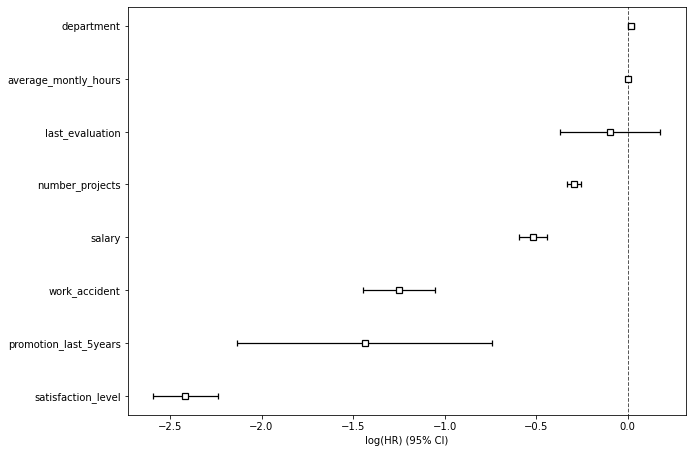

In [54]:
cph.plot()

In [55]:
print(cph.params_)

covariate
satisfaction_level      -2.415501
last_evaluation         -0.095827
number_projects         -0.291540
average_montly_hours     0.001799
work_accident           -1.251247
promotion_last_5years   -1.436294
department               0.015506
salary                  -0.518306
Name: coef, dtype: float64


Recordemos que en este modelo trabajamos con el logaritmo de la función de riesgo, por lo tanto

100*(e^ci-1) proporciona el cambio en porcentaje para nuestra función de riesgo donde ci es el i-ésimo coeficiente


(la operación la hice con la calculadora)

Variable(coeficiente): explicación

1.satisfaction_level(-2.42): un alto nivel de satisfacción reduce el riesgo de que nuestros empleados renuncien en 91.11%.

2.work_accident(-1.25): un alto nivel de satisfacción reduce el riesgo de que nuestros empleados renuncien en 71.35%.

3.promotion_last_5years(-1.44): un alto nivel de satisfacción reduce el riesgo de que nuestros empleados renuncien en 76.31%.

## 13)

Las variables que reducen en mayor porcentaje las renuncias son: satisfaction_level, work_accident y promotion_last_5years

Primero, comprobamos que nuestra forma de medir el nivel de satisfacción es eficaz, ya que un alto nivel de satisfacción reduce las renuncias

Recomendamos poner especial atención a prevenir los accidentes de trabajo

Además de ofrecerle un ascenso al menos cada 5 años a los empleados que sean más valiosos para la empresa

## 14)

**Limitaciones Kaplan-Meier**

Tiene una capacidad limitada para estimar la supervivencia ajustada por covariables, es decir, no es bueno para analizar muchas variables

**Limitaciones Cox**: las tasas de falla deben ser proporcionales y las covariables independientes

Deben cumplir con los supuestos fundamentales del modelo de Cox:

a) La no existencia de influencia de los individuos en la estimación del modelo.

b) La no influencia de los individuos en la estimación de cada parámetro del modelo.

c) La inexistencia de heterogeneidad no observada

d) La adecuacidad de la forma funcional.